# Lecture 5: Introduction to k-Means Clustering

In this notebook, we will implement the **k-Means algorithm** step-by-step from scratch. We'll use `numpy` for computation and `matplotlib` for visualization.

**Learning Goals:**
1. Understand the k-Means algorithm at a low level.
2. Visualize each step: initialization, assignment, update.
3. See convergence in action.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline
np.random.seed(42)

---
## 1. Generate Synthetic Data

We'll create a 2D dataset with clear cluster structure using `make_blobs`.

In [71]:
# Generate 300 points in 3 blobs
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.80, random_state=0)

print(f"Dataset shape: {X.shape}")
print(f"Number of points: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

Dataset shape: (300, 2)
Number of points: 300
Number of features: 2


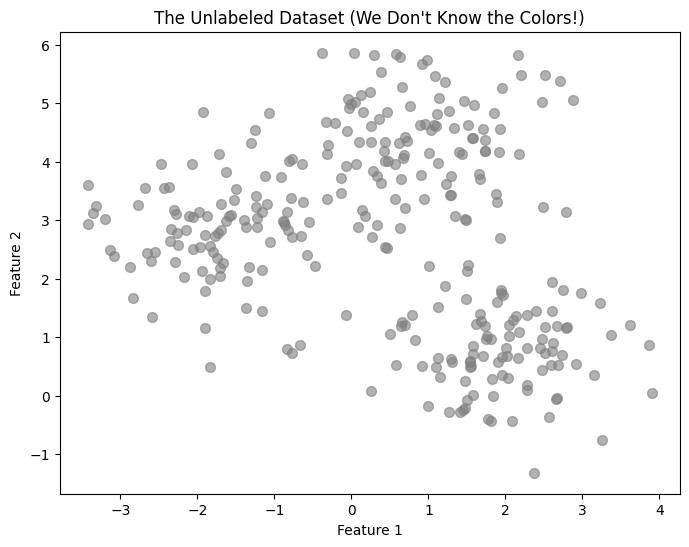

In [72]:
# Visualize the unlabeled data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.6)
plt.title("The Unlabeled Dataset (We Don't Know the Colors!)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---
## 2. Implementing k-Means Step-by-Step

Recall the algorithm:
1. **Initialize** $K$ centers randomly.
2. **Assign** each point to its nearest center.
3. **Update** each center to the mean of its assigned points.
4. **Repeat** steps 2-3 until convergence.

### Step 1: Initialization

We randomly select $K$ data points to be our initial centers.

In [73]:
K = 3  # Number of clusters
num_points = X.shape[0]  # Total number of data points (300)

# Choose K random selection indices from 0 to num_points-1
# replace=False means we won't pick the same index twice
np.random.seed(0)
initial_indices = np.random.choice(num_points, K, replace=False)

# Select the data points at these indices to be our initial centers
centers = X[initial_indices].copy()

print("Initial Centers:")
print(centers)

Initial Centers:
[[0.62814724 5.78319831]
 [0.66640862 4.06194513]
 [3.37377547 1.02904586]]


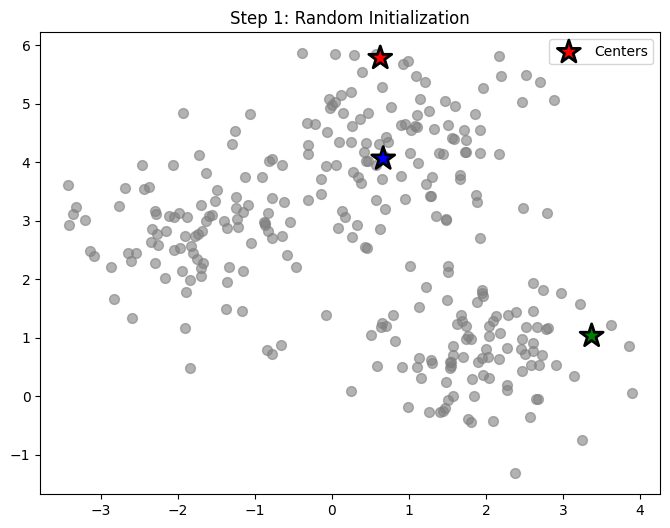

In [74]:
# Visualize initialization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c=['red', 'blue', 'green'], 
            s=300, marker='*', edgecolor='black', linewidth=2, label='Centers')
plt.title("Step 1: Random Initialization")
plt.legend()
plt.show()

### Step 2: Assignment

For each data point, find the nearest center and assign it to that cluster.

In [ ]:
def assign_clusters(X, centers):
    """
    Assign each point in X to the nearest center.
    
    Parameters:
        X: (N, D) array of data points
        centers: (K, D) array of cluster centers
    
    Returns:
        labels: (N,) array of cluster assignments (0 to K-1)
    """
    N = X.shape[0]  # Number of data points
    K = centers.shape[0]  # Number of clusters
    
    # Create an array to store the cluster assignment for each point
    labels = np.zeros(N, dtype=int)
    
    # For each data point, find the nearest center
    for i in range(N):
        point = X[i]  # Current data point (shape: D)
        
        # Calculate squared distances from this point to all K centers
        squared_distances = np.zeros(K)
        
        ### BEGIN SOLUTION
        for k in range(K):
            # Squared Euclidean distance: sum of squared differences
            diff = point - centers[k]
            squared_distances[k] = np.sum(diff ** 2)
        
        # Find which center is closest (index of minimum squared distance)
        nearest_center = np.argmin(squared_distances)
        
        ### END SOLUTION
        
        # Assign this point to the nearest cluster
        labels[i] = nearest_center
    
    return labels

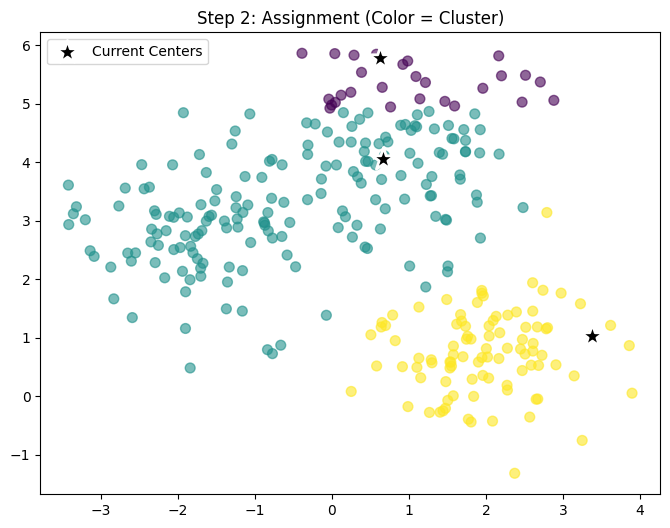

In [76]:
# Perform assignment
labels = assign_clusters(X, centers)

# Visualize assignment
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, marker='*', 
            edgecolor='white', linewidth=2, label='Current Centers')
plt.title("Step 2: Assignment (Color = Cluster)")
plt.legend()
plt.show()

### Step 3: Update Centers

Move each center to the mean of its assigned points.

In [ ]:
def update_centers(X, labels, K):
    """
    Update cluster centers to the mean of their assigned points.
    
    Parameters:
        X: (N, D) array of data points
        labels: (N,) array of cluster assignments
        K: number of clusters
    
    Returns:
        new_centers: (K, D) array of updated centers
    """
    N = X.shape[0]  # Number of data points
    D = X.shape[1]  # Number of features/dimensions
    
    # Create an array to store the new centers
    new_centers = np.zeros((K, D))
    
    # For each cluster, compute the mean of all points assigned to it
    for k in range(K):
        # Find all points assigned to cluster k
        # We'll collect them by checking each point's label
        points_in_cluster = []
        
        ### BEGIN SOLUTION
        for i in range(N):
            if labels[i] == k:
                points_in_cluster.append(X[i])
        
        # Convert list to numpy array for easier computation
        points_in_cluster = np.array(points_in_cluster)
        
        # Compute the mean of all points in this cluster
        # The mean is computed along axis 0 (average each feature separately)
        if len(points_in_cluster) > 0:
            new_centers[k] = np.mean(points_in_cluster, axis=0)
        else:
            # If no points assigned to this cluster, keep the old center
            # (This rarely happens but we handle it for robustness)
            new_centers[k] = new_centers[k]  # Stays at zero; could use old center instead
        
        ### END SOLUTION
    
    return new_centers

In [78]:
# Perform update
old_centers = centers.copy()
new_centers = update_centers(X, labels, K)

print("Old Centers:")
print(old_centers)
print("\nNew Centers:")
print(new_centers)

Old Centers:
[[0.62814724 5.78319831]
 [0.66640862 4.06194513]
 [3.37377547 1.02904586]]

New Centers:
[[ 1.02155293  5.36241976]
 [-0.5192672   3.28770642]
 [ 1.98903263  0.73862055]]


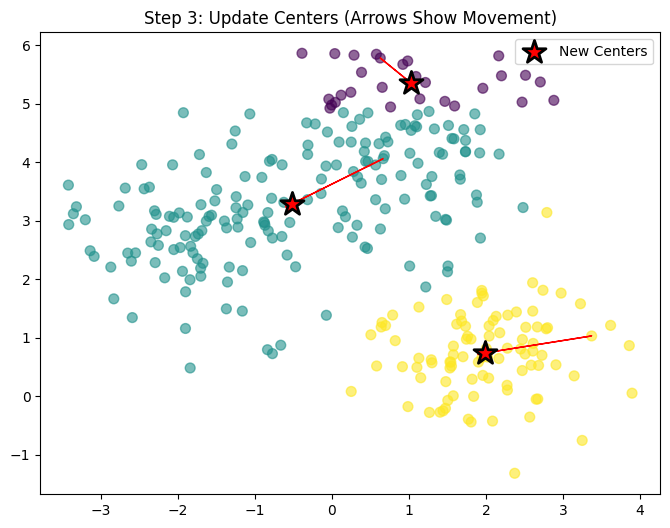

In [79]:
# Visualize the update (with arrows showing movement)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.6)

# Draw arrows from old to new centers
for i in range(K):
    plt.arrow(old_centers[i, 0], old_centers[i, 1], 
              new_centers[i, 0] - old_centers[i, 0], 
              new_centers[i, 1] - old_centers[i, 1], 
              head_width=0.15, head_length=0.1, fc='red', ec='red')

plt.scatter(new_centers[:, 0], new_centers[:, 1], c='red', s=300, marker='*', 
            edgecolor='black', linewidth=2, label='New Centers')
plt.title("Step 3: Update Centers (Arrows Show Movement)")
plt.legend()
plt.show()

# Update centers for next iteration
centers = new_centers

---
## 3. The Full Loop

Now let's put it all together and run until convergence.

In [ ]:
def kmeans(X, K, max_iters=100, seed=None):
    """
    Run k-Means clustering.
    
    Parameters:
        X: (N, D) data
        K: number of clusters
        max_iters: maximum iterations
        seed: random seed
    
    Returns:
        centers: final cluster centers
        labels: final cluster assignments
        history: list of (centers, labels) at each iteration
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Initialize
    indices = np.random.choice(X.shape[0], K, replace=False)
    centers = X[indices].copy()
    
    history = []
    
    for i in range(max_iters):
        # Assign
        labels = assign_clusters(X, centers)
        history.append((centers.copy(), labels.copy()))
        
        # Update
        new_centers = update_centers(X, labels, K)
        
        # Check convergence
        ### BEGIN SOLUTION
        if np.allclose(centers, new_centers):
            print(f"Converged at iteration {i+1}!")
            break
        
        ### END SOLUTION
        
        centers = new_centers
    
    return centers, labels, history

In [81]:
# Run k-Means
final_centers, final_labels, history = kmeans(X, K=3, seed=42)

print(f"\nNumber of iterations: {len(history)}")

Converged at iteration 5!

Number of iterations: 5


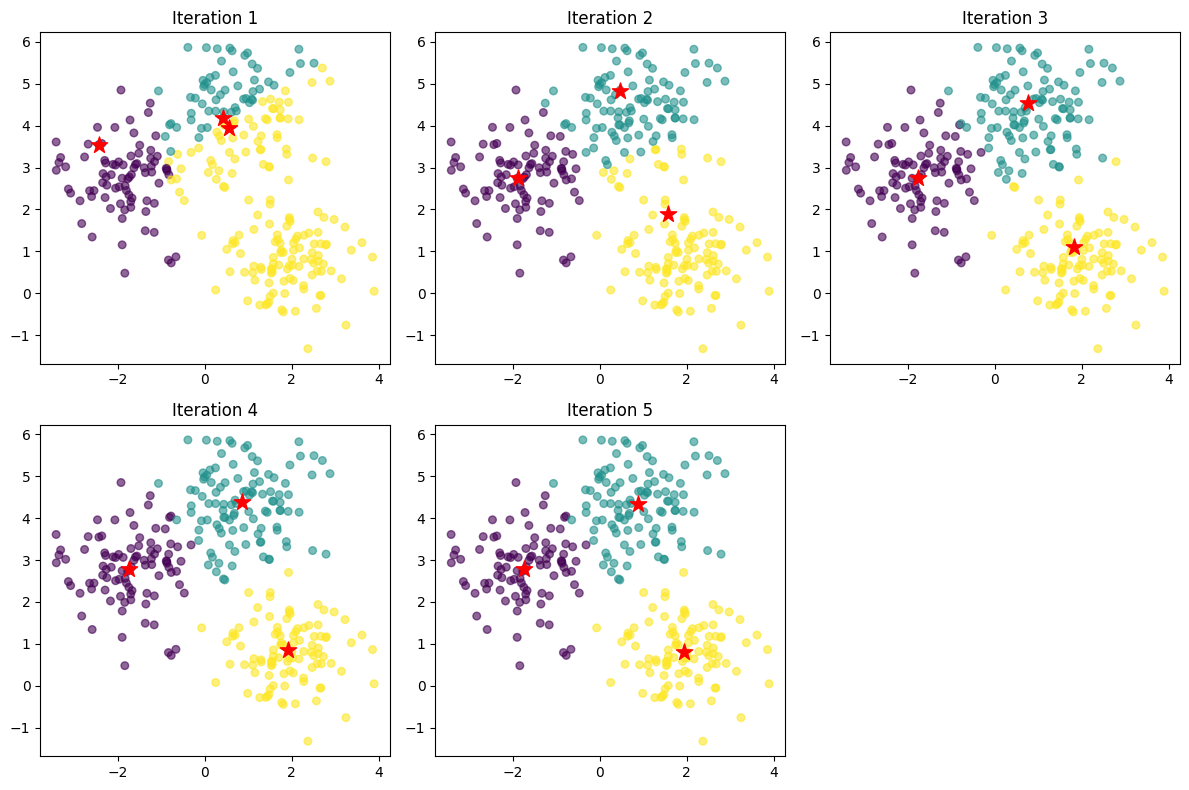

In [82]:
# Visualize each iteration
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(history):
        centers_i, labels_i = history[i]
        ax.scatter(X[:, 0], X[:, 1], c=labels_i, s=30, cmap='viridis', alpha=0.6)
        ax.scatter(centers_i[:, 0], centers_i[:, 1], c='red', s=150, marker='*')
        ax.set_title(f"Iteration {i+1}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

---
## 4. Compare with Ground Truth (Cheating!)

Since we know the true labels from `make_blobs`, let's see how well k-Means did.

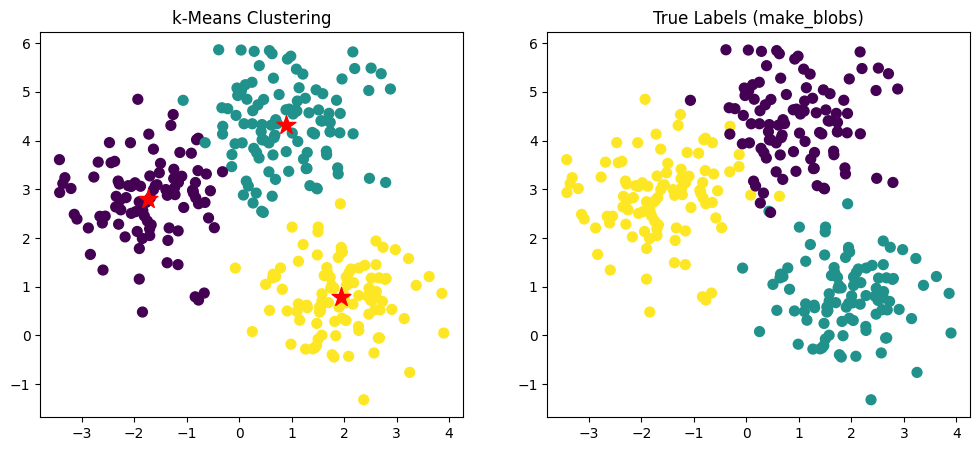

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# k-Means result
axes[0].scatter(X[:, 0], X[:, 1], c=final_labels, s=50, cmap='viridis')
axes[0].scatter(final_centers[:, 0], final_centers[:, 1], c='red', s=200, marker='*')
axes[0].set_title("k-Means Clustering")

# Ground truth
axes[1].scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
axes[1].set_title("True Labels (make_blobs)")

plt.show()

🎉 **Success!** k-Means found the natural clusters in the data!